# **Data Aanlysis**

<img src ='images/Picture1.png'>

## 1- Define Question

### What specific criteria will be used to define "success" in the context of completing the rigorous training curriculum?

## 2-Data Loading and Preprocessing

**Step 1 Collect data**:
Ddata already exists .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , OrdinalEncoder

**Step 2 Understanding Data**

In [2]:
df_train = pd.read_csv('measuring-student-persistence-and-completion-rate/train.csv')

In [3]:
df_test = pd.read_csv('measuring-student-persistence-and-completion-rate/test.csv')

In [4]:
df_reg = pd.read_csv('measuring-student-persistence-and-completion-rate/registration.csv')

In [5]:
df_train.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0


In [6]:
df_test.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Program Days,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working
0,d8524ed6-a1b2-4f6f-9041-66eebcab899a,23.0,أنثى,منطقة الرياض,الرياض,451d680f-e067-41c0-a998-6b3da3963bca,CAUF,SWPS,تقليدية,متوسط,...,5,لا,البكالوريوس,علوم الحاسب الالي,NaN,3.72,4.0,خريج,NaN,NaN
1,5490b973-d85e-4b26-93a8-ecc11c47a5a0,31.0,أنثى,منطقة الرياض,الرياض,4957a013-46a7-419c-93d5-ebf3741ab2a1,PCRF,PCRF,تقليدية,مبتدئ,...,19,لا,البكالوريوس,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,2.00,4.0,NaN,NaN,NaN
2,3c1d99c8-f25b-4198-b904-aacb15164888,29.0,أنثى,منطقة الرياض,الرياض,03ec0d20-11cd-49bf-9b54-de5d12d4bd76,CAUF,SWPS,NaN,NaN,...,12,نعم,البكالوريوس,شبكات الحاسب الآلي,تكنولوجيا الاتصالات والمعلومات,3.72,5.0,موظف,دوام كامل,Yes
3,9e57ee90-2d60-48b8-91a1-7caa49f03810,23.0,أنثى,منطقة الرياض,الرياض,4ad7a7dc-abcf-43fa-b2e3-07095e083661,PCRF,PCRF,NaN,متقدم,...,5,نعم,البكالوريوس,Biology,NaN,4.47,5.0,غير موظف,NaN,NaN
4,a11b482b-6cc3-4e1a-8b95-60ab2e42097a,30.0,أنثى,منطقة الرياض,الرياض,60494e5b-b20a-4440-ab75-0fd257748dcc,TOSL,NaN,داعمة,متقدم,...,33,نعم,الدبلوم,تقنية المعلومات,تكنولوجيا الاتصالات والمعلومات,4.46,5.0,غير موظف,دوام كامل,No


In [7]:
df_reg.sample(8)

,Student ID,PCRF,GRST,CAUF,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration
2800,74944b6c-6c44-4042-926d-71a179dcf133,0,0,4,0,0,0,0,0,0,0,0,4
5478,e22d888d-9c7b-46ea-a4d2-4cbd6cba8ddc,1,1,5,1,0,0,0,6,0,0,0,14
3690,98c91cbf-66f0-47d9-9eed-df09701abf5d,0,0,2,0,0,0,0,2,0,0,0,4
1679,45fbfafa-057f-425f-97d0-1b512226070e,3,0,7,1,1,0,0,3,0,0,0,15
5363,dd290319-cc99-499f-8341-303af5602539,5,1,2,0,0,0,0,0,0,0,0,8
5476,e21b9466-41bd-4c36-af53-47937897062e,11,1,4,0,0,0,0,0,0,0,2,18
168,07c093da-3063-4ee1-b7b9-d43c5ecdb3c1,14,0,1,3,0,0,0,0,0,0,0,18
195,08b2f0c9-bc03-4e96-b653-7ab56cf0b54c,0,0,1,0,0,0,0,0,0,0,9,10


In [8]:
df_train.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y'],
      dtype='object')

In [9]:
df_train.shape

(6548, 24)

In [10]:
df_test.shape

(818, 23)

In [11]:
df_train.dtypes

Student ID                         object
Age                               float64
Gender                             object
Home Region                        object
Home City                          object
Program ID                         object
Program Main Category Code         object
Program Sub Category Code          object
Technology Type                    object
Program Skill Level                object
Program Presentation Method        object
Program Start Date                 object
Program End Date                   object
Program Days                        int64
Completed Degree                   object
Level of Education                 object
Education Speaciality              object
College                            object
University Degree Score           float64
University Degree Score System    float64
Employment Status                  object
Job Type                           object
Still Working                      object
Y                                 

In [12]:
df_train.describe()

,Age,Program Days,University Degree Score,University Degree Score System,Y
count,6456.000000,6548.000000,6467.000000,6467.000000,6548.000000
mean,26.831165,19.691662,8.224432,9.773929,0.158674
std,5.535967,32.112061,19.120384,21.259962,0.365400
min,18.000000,3.000000,0.000000,4.000000,0.000000
25%,23.000000,5.000000,3.300000,5.000000,0.000000
50%,25.000000,12.000000,4.000000,5.000000,0.000000
75%,29.000000,19.000000,4.510000,5.000000,0.000000
max,57.000000,292.000000,100.000000,100.000000,1.000000


Text(0.5, 0, 'Value')

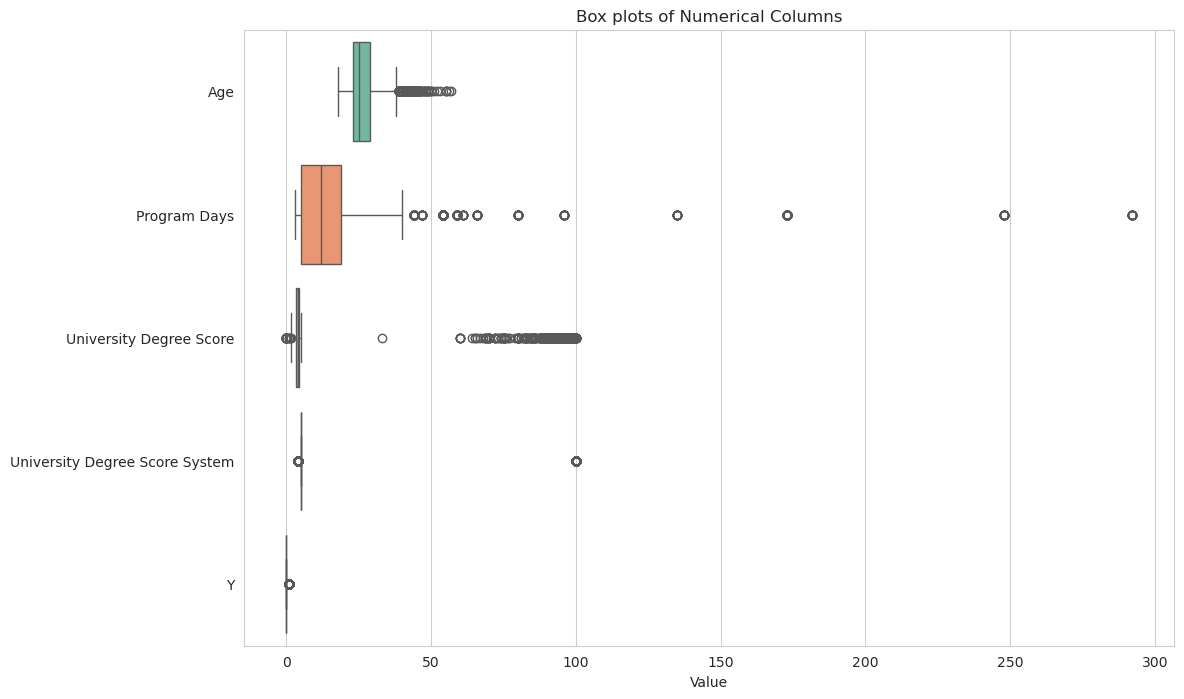

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, orient="h", palette="Set2")
plt.title('Box plots of Numerical Columns')
plt.xlabel('Value')

In [14]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6456.0,26.831165,5.535967,18.0,23.0,25.0,29.00,57.0
Program Days,6548.0,19.691662,32.112061,3.0,5.0,12.0,19.00,292.0
University Degree Score,6467.0,8.224432,19.120384,0.0,3.3,4.0,4.51,100.0
University Degree Score System,6467.0,9.773929,21.259962,4.0,5.0,5.0,5.00,100.0
Y,6548.0,0.158674,0.365400,0.0,0.0,0.0,0.00,1.0


In [15]:
df_train.describe(include = "all")

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
count,6548,6456.000000,6548,6546,6546,6548,6548,5613,3566,4902,...,6548,6522,6271,2658,6467.000000,6467.000000,5982,1981,1981,6548.000000
unique,5196,NaN,2,13,92,223,10,11,3,3,...,2,5,871,9,NaN,NaN,6,4,2,NaN
top,415cfcb1-8dfa-459d-b719-d942cc5e19e1,NaN,أنثى,منطقة الرياض,الرياض,ab263106-20a8-42aa-9626-278e62ae3a49,CAUF,SWPS,تقليدية,متوسط,...,نعم,البكالوريوس,علوم الحاسبات,تكنولوجيا الاتصالات والمعلومات,NaN,NaN,موظف,دوام كامل,Yes,NaN
freq,9,NaN,3664,4783,4720,134,2358,1788,2693,2134,...,5206,5429,1067,2312,NaN,NaN,2801,1398,1246,NaN
mean,NaN,26.831165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.224432,9.773929,NaN,NaN,NaN,0.158674
std,NaN,5.535967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.120384,21.259962,NaN,NaN,NaN,0.365400
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,4.000000,NaN,NaN,NaN,0.000000
25%,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.300000,5.000000,NaN,NaN,NaN,0.000000
50%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,NaN,NaN,0.000000
75%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.510000,5.000000,NaN,NaN,NaN,0.000000


In [16]:
df_reg.describe()

,PCRF,GRST,CAUF,INFA,ABIR,SERU,TOSL,APMR,DTFH,QWLM,N/A,Total Regestration
count,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.0,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000
mean,1.525847,0.233025,2.462972,0.763734,0.080538,0.061254,0.0,1.412899,0.002755,0.009561,1.691298,8.308702
std,2.826037,0.556516,3.675233,1.410859,0.320295,0.248446,0.0,2.263584,0.055424,0.097319,3.618898,9.613899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000
75%,2.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,2.000000,11.000000
max,27.000000,4.000000,45.000000,13.000000,4.000000,2.000000,0.0,19.000000,2.000000,1.000000,47.000000,109.000000


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

In [18]:
sample_data = df_train[['Completed Degree', 'Y']].sample(20)
sample_data.head()

,Completed Degree,Y
6018,نعم,0
2593,نعم,0
3778,نعم,0
3191,نعم,0
3773,نعم,0


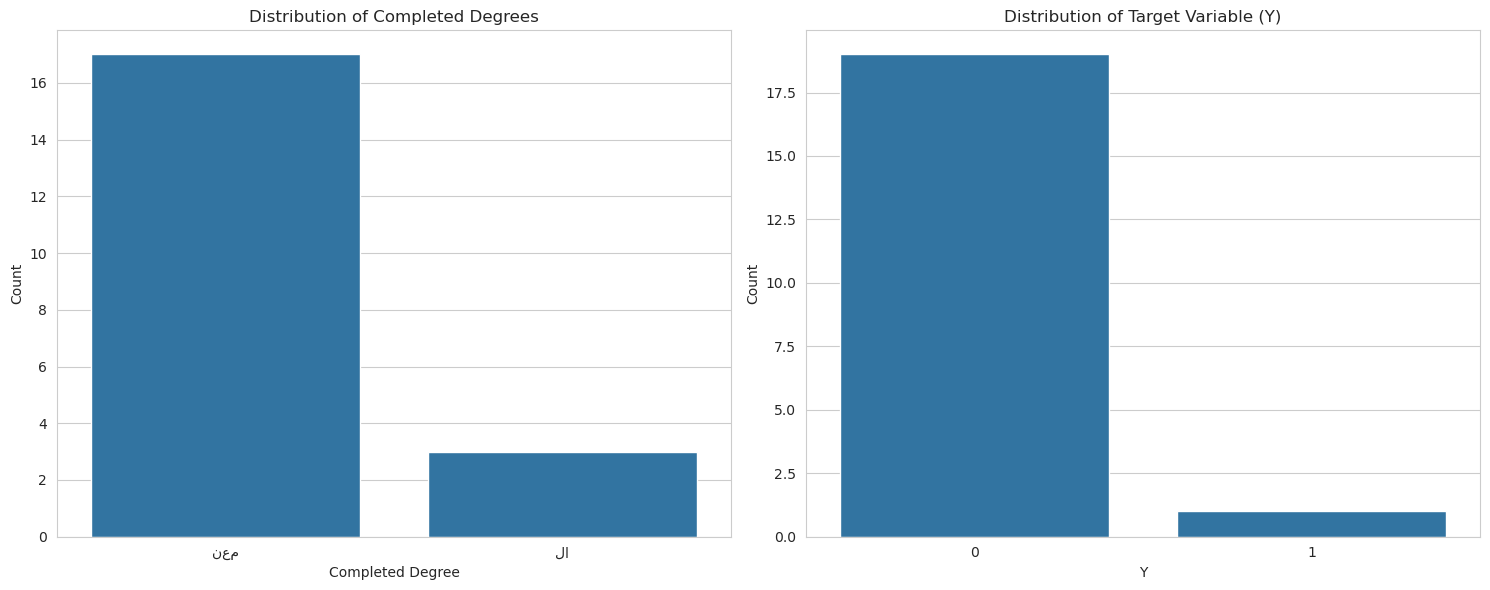

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.countplot(x='Completed Degree', data=sample_data, ax=axes[0])
axes[0].set_title('Distribution of Completed Degrees')
axes[0].set_xlabel('Completed Degree')
axes[0].set_ylabel('Count')

sns.countplot(x='Y', data=sample_data, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Y)')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Count')

plt.tight_layout()

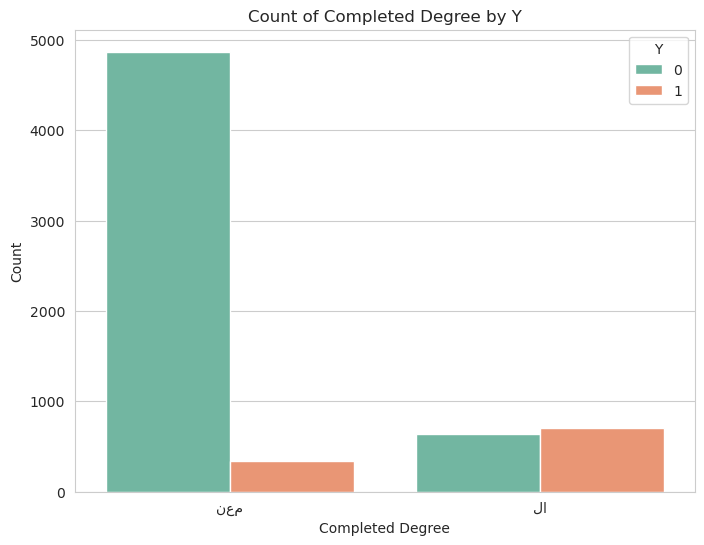

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Completed Degree', hue='Y', data=df_train, palette='Set2')
plt.title('Count of Completed Degree by Y')
plt.xlabel('Completed Degree')
plt.ylabel('Count')
plt.legend(title='Y', loc='upper right')


In [21]:
df_train['Program Main Category Code'].value_counts()

Program Main Category Code
CAUF    2358
PCRF    1682
APMR    1299
TOSL     500
GRST     208
ABIR     205
INFA     179
SERU      53
DTFH      33
QWLM      31
Name: count, dtype: int64

In [22]:
df_train['Program Sub Category Code'].value_counts()

Program Sub Category Code
SWPS    1788
PCRF    1682
SRTA     700
INFA     510
TOSL     295
CRDP     243
ERST     172
KLTM     117
QTDY      51
ASCW      36
ABIR      19
Name: count, dtype: int64

In [23]:
tech_type_counts = df_train['Technology Type'].value_counts()

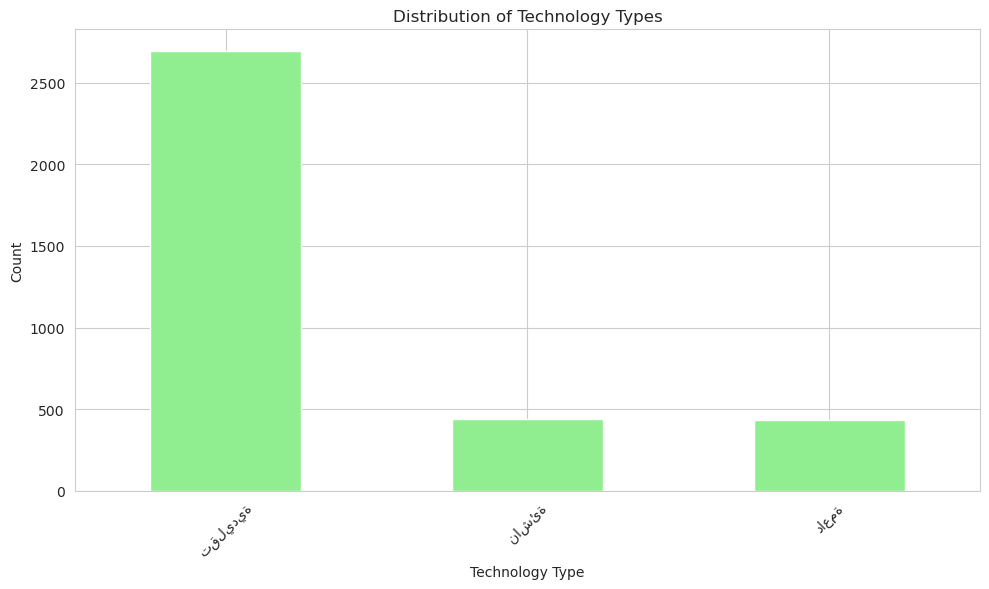

In [24]:
plt.figure(figsize=(10, 6))
tech_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Technology Types')
plt.xlabel('Technology Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout() 

In [25]:
skill_level_counts = df_train['Program Skill Level'].value_counts()

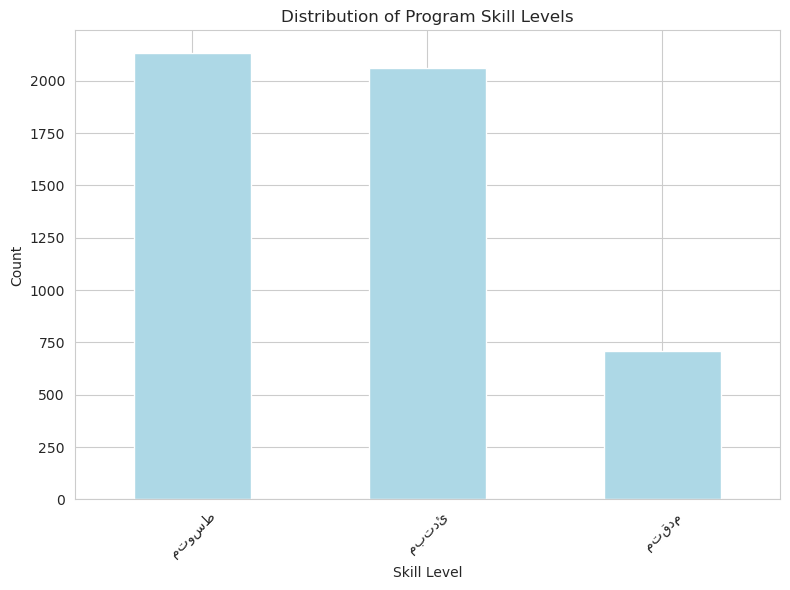

In [26]:
plt.figure(figsize=(8, 6))
skill_level_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Program Skill Levels')
plt.xlabel('Skill Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  

In [27]:
df_train['Completed Degree'].value_counts()

Completed Degree
نعم    5206
لا     1342
Name: count, dtype: int64

In [28]:
education_level_counts = df_train['Level of Education'].value_counts()

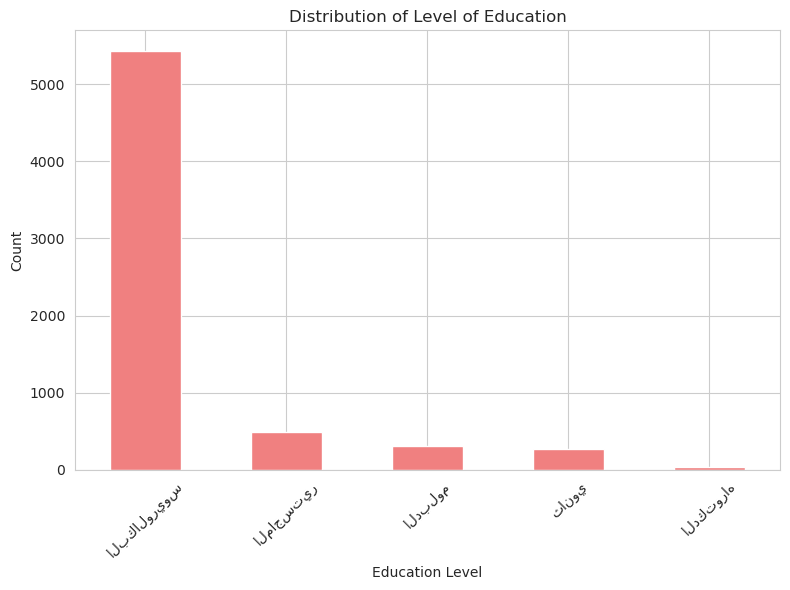

In [29]:
plt.figure(figsize=(8, 6))
education_level_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Level of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  

In [30]:
count_education_y = ((df_train['Level of Education'] == 'البكالوريوس') & (df_train['Y'] == 0)).sum()

In [31]:
((df_train['Level of Education'] == 'الماجستير') & (df_train['Y'] == 0)).sum()


416

In [32]:
((df_train['Level of Education'] == 'الدبلوم') & (df_train['Y'] == 0)).sum()


250

In [33]:
((df_train['Level of Education'] == 'ثانوي') & (df_train['Y'] == 0)).sum()


196

In [34]:
((df_train['Level of Education'] == 'الدكتوراه') & (df_train['Y'] == 0)).sum()


24

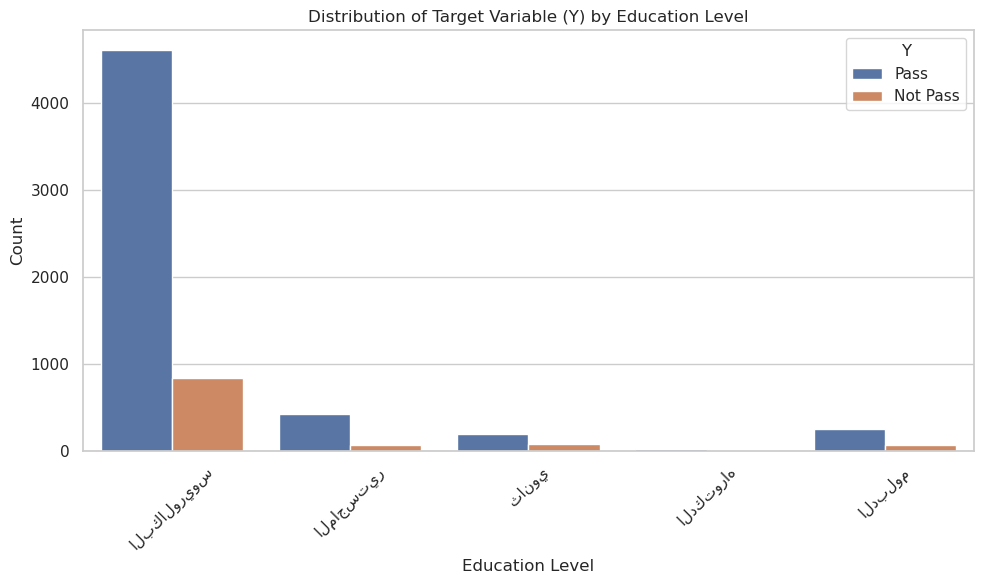

In [35]:
df_train['Y'] = df_train['Y'].map({0: 'pass', 1: 'not pass'})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Level of Education', hue='Y', data=df_train)
plt.title('Distribution of Target Variable (Y) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45) 

# Custom legend
plt.legend(title='Y', labels=['Pass', 'Not Pass'], loc='upper right')

plt.tight_layout()
plt.show()

In [36]:
df_train['College'].value_counts()

College
تكنولوجيا الاتصالات والمعلومات         2312
الأعمال والإدارة والقانون               153
العلوم الطبيعية والرياضيات والإحصاء      62
الهندسة والتصنيع والبناء                 43
الفنون والعلوم الإنسانية                 38
العلوم الاجتماعية والصحافة والإعلام      25
التعليم                                  19
الصحة والرفاة                             4
البرامج والمؤهلات العامة                  2
Name: count, dtype: int64

In [37]:
score_system_counts = df_train['University Degree Score System'].value_counts()

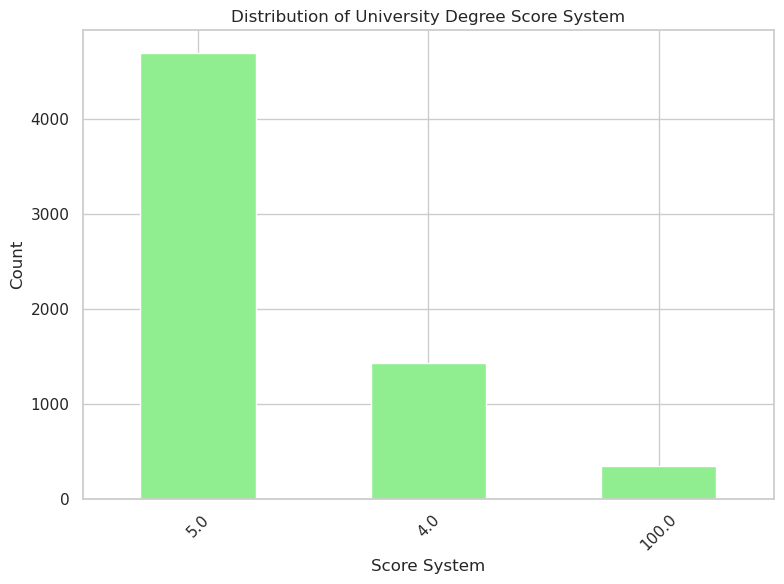

In [38]:
plt.figure(figsize=(8, 6))
score_system_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of University Degree Score System')
plt.xlabel('Score System')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  

In [39]:
employment_status_counts = df_train['Employment Status'].value_counts()

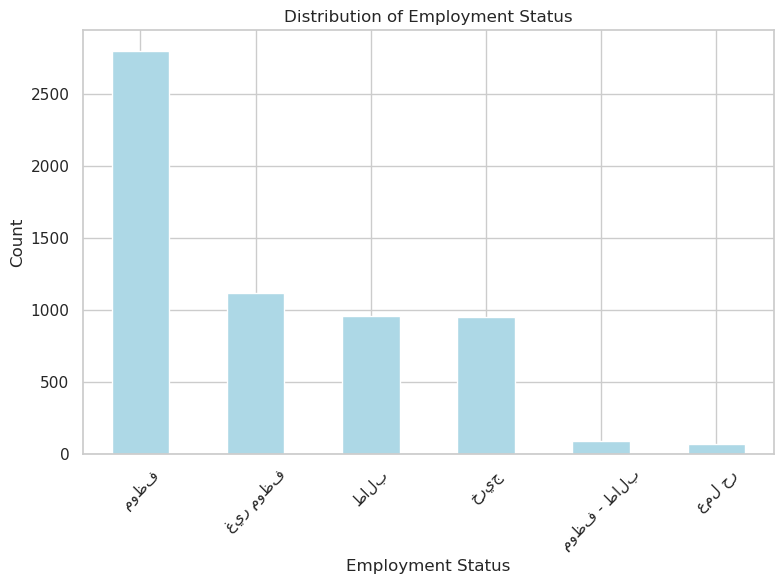

In [40]:
plt.figure(figsize=(8, 6))
employment_status_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout() 

In [41]:
df_train['Job Type'].value_counts()

Job Type
دوام كامل    1398
تدريب         478
دوام جزئي      61
تطوع           44
Name: count, dtype: int64

In [42]:
df_train['Still Working'].value_counts()

Still Working
Yes    1246
No      735
Name: count, dtype: int64

In [43]:
df_train[['Program Main Category Code' , 'Program Sub Category Code' ,'Y']].sample(10)

,Program Main Category Code,Program Sub Category Code,Y
4460,CAUF,SWPS,pass
4447,ABIR,NaN,pass
4744,APMR,QTDY,pass
5441,PCRF,PCRF,not pass
4631,PCRF,PCRF,pass
6283,PCRF,PCRF,not pass
2900,ABIR,INFA,pass
540,CAUF,SWPS,pass
2653,CAUF,SWPS,pass
1822,CAUF,SWPS,pass


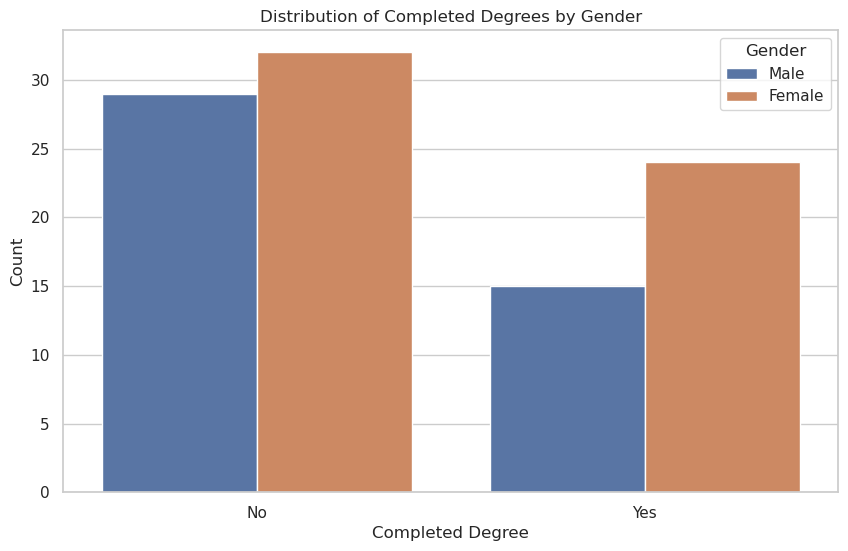

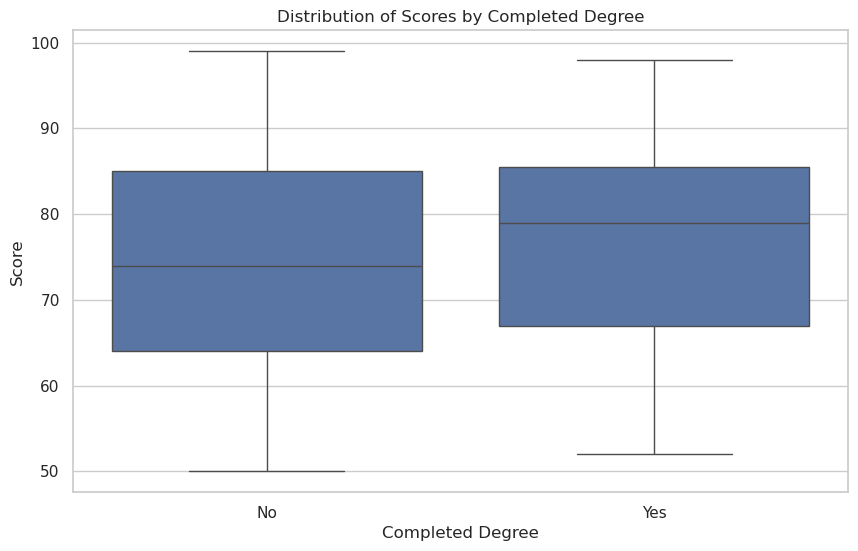

                  count       mean        std   min   25%   50%   75%   max
Completed Degree                                                           
No                 61.0  74.081967  14.387836  50.0  64.0  74.0  85.0  99.0
Yes                39.0  76.051282  12.565510  52.0  67.0  79.0  85.5  98.0

Concluding Remarks:
The analysis reveals that there is a difference in the distribution of completed degrees by gender.
Additionally, the distribution of scores varies based on whether the degree is completed or not.


In [46]:
# Generate random data for illustration
np.random.seed(0)
gender = np.random.choice(['Male', 'Female'], size=100)
age = np.random.randint(18, 65, size=100)
completed_degree = np.random.choice(['Yes', 'No'], size=100)
score = np.random.randint(50, 100, size=100)

df = pd.DataFrame({'Gender': gender, 'Age': age, 'Completed Degree': completed_degree, 'Score': score})

# Visualize the distribution of completed degrees by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Completed Degree', hue='Gender')
plt.title('Distribution of Completed Degrees by Gender')
plt.xlabel('Completed Degree')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of scores by completed degree
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Completed Degree', y='Score')
plt.title('Distribution of Scores by Completed Degree')
plt.xlabel('Completed Degree')
plt.ylabel('Score')
plt.show()

# Statistical summary
summary_stats = df.groupby('Completed Degree')['Score'].describe()
print(summary_stats)

# Concluding remarks
print("\nConcluding Remarks:")
print("The analysis reveals that there is a difference in the distribution of completed degrees by gender.")
print("Additionally, the distribution of scores varies based on whether the degree is completed or not.")


**Step 3 Data Wrangling - Cleaning**

Data wrangling, also known as preprocessing, is the process of transforming raw data into a more suitable format for analysis, ensuring data quality and usability:

- **Handling Missing Values**: the process involves identifying and addressing missing or null values in a dataset by either replacing them with appropriate values or removing them entirely.

In [47]:
df_train.isnull().sum()

Student ID                           0
Age                                 92
Gender                               0
Home Region                          2
Home City                            2
Program ID                           0
Program Main Category Code           0
Program Sub Category Code          935
Technology Type                   2982
Program Skill Level               1646
Program Presentation Method          0
Program Start Date                   0
Program End Date                     0
Program Days                         0
Completed Degree                     0
Level of Education                  26
Education Speaciality              277
College                           3890
University Degree Score             81
University Degree Score System      81
Employment Status                  566
Job Type                          4567
Still Working                     4567
Y                                    0
dtype: int64

In [48]:
df_train.replace("?", np.NaN, inplace = True)

### Deal with missing data
<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


In [49]:
# Replace 'median_age' with the actual median age in tarin
median_age = df_train['Age'].median()
print(f'The median of student is {median_age}')
# Fill missing values in the 'Age' column with the median age
df_train['Age'].fillna(median_age, inplace=True)

The median of student is 25.0


In [50]:
# Replace 'median_age' with the actual median age in test
median_aget = df_test['Age'].median()
print(f'The median of student is {median_aget}')
# Fill missing values in the 'Age' column with the median age
df_test['Age'].fillna(median_aget, inplace=True)

The median of student is 25.0


In [51]:
# Fill missing values in the 'Home Region' column with the mode in tarin
mode_home_region = df_train['Home Region'].mode()[0]
df_train['Home Region'].fillna(mode_home_region, inplace=True)

In [52]:
# Fill missing values in the 'Home Region' column with the mode in tarin
mode_home_region = df_train['Home City'].mode()[0]
df_train['Home City'].fillna(mode_home_region, inplace=True)

In [53]:
# Fill missing values in the 'Home Region' column with the mode in tarin
mode_home_region = df_test['Home City'].mode()[0]
df_test['Home City'].fillna(mode_home_region, inplace=True)

In [54]:
# Fill missing values in the 'Home Region' column with the mode in test
mode_home_region_test = df_test['Home Region'].mode()[0]
df_test['Home Region'].fillna(mode_home_region, inplace=True)

In [55]:
df_train['Program Main Category Code'].isnull().sum()

0

In [56]:
df_train['Program Sub Category Code'].isnull().sum()

935

In [57]:
df_train['Technology Type'].fillna('غير محدد', inplace=True)

In [58]:
df_test['Technology Type'].fillna('غير محدد', inplace=True)

In [59]:
mode_skill = df_train['Program Skill Level'].mode()[0]
df_train['Program Skill Level'].fillna(mode_skill, inplace=True)

In [60]:
mode_skill = df_train['Program Skill Level'].mode()[0]
df_test['Program Skill Level'].fillna(mode_skill, inplace=True)

In [61]:
df_train['Education Speaciality'].fillna('غير محدد', inplace=True)

In [62]:
df_test['Education Speaciality'].fillna('غير محدد', inplace=True)

In [63]:
df_train.drop('College', axis=1, inplace=True)

In [64]:
df_test.drop('College', axis=1, inplace=True)

In [65]:
#Level of Education                  3
#Education Speaciality              37
df_train[['Level of Education', 'Education Speaciality' , 'Y']].sample(10)

,Level of Education,Education Speaciality,Y
1043,البكالوريوس,شبكات الحاسب الآلي,pass
888,الماجستير,Long Island University-New York,pass
3768,البكالوريوس,نظم المعلومات الحاسوبية,pass
311,البكالوريوس,علوم حاسب,pass
4670,البكالوريوس,Computer Science,pass
5523,البكالوريوس,هندسة الاتصالات والشبكات وتقنية المعلومات,pass
5424,البكالوريوس,علوم الحاسبات,pass
3321,البكالوريوس,Computer Science,pass
4654,البكالوريوس,امن سبراني,not pass
4511,البكالوريوس,علوم الحاسبات,pass


In [66]:
#University Degree Score            11
#University Degree Score System     11
df_train[['University Degree Score', 'University Degree Score System' , 'Y']].sample(10)

,University Degree Score,University Degree Score System,Y
6039,3.00,5.0,pass
4247,4.56,5.0,pass
2861,3.85,5.0,not pass
925,3.00,5.0,pass
3372,3.54,4.0,pass
2119,4.89,5.0,pass
5811,4.00,5.0,pass
946,3.23,5.0,pass
1894,4.00,4.0,not pass
4288,4.44,5.0,pass


In [67]:
df_train[['University Degree Score', 'University Degree Score System']].isnull().sum()

University Degree Score           81
University Degree Score System    81
dtype: int64

In [68]:
df_train['University Degree Score'].notna().sum() == df_train['University Degree Score System'].notna().sum()

True

In [69]:
df_train['University Degree Score'].fillna(0, inplace=True)
df_train['University Degree Score System'].fillna(0, inplace=True)

In [70]:
df_test['University Degree Score'].fillna(0, inplace=True)
df_test['University Degree Score System'].fillna(0, inplace=True)

In [71]:
# Calculate the mode of the 'Employment Status' column
mode_employment_status = df_train['Employment Status'].mode()[0]
# Fill missing values in the 'Employment Status' column with the mode
df_train['Employment Status'].fillna(mode_employment_status, inplace=True)

In [72]:
# Calculate the mode of the 'Employment Status' column
mode_employment_status = df_test['Employment Status'].mode()[0]
# Fill missing values in the 'Employment Status' column with the mode
df_test['Employment Status'].fillna(mode_employment_status, inplace=True)

In [73]:
self_employed_rows = df_train[df_train['Employment Status'] == 'عمل حر']
print("Job Type and Still Working for rows where Employment Status is 'عمل حر':")
self_employed_rows[['Job Type', 'Still Working']].isnull().sum()

Job Type and Still Working for rows where Employment Status is 'عمل حر':


Job Type         68
Still Working    68
dtype: int64

In [74]:
self_employed_rows = df_train[df_train['Employment Status'] == 'خريج']
print("Job Type and Still Working for rows where Employment Status is 'خريج':")
self_employed_rows[['Job Type', 'Still Working']].isnull().sum()

Job Type and Still Working for rows where Employment Status is 'خريج':


Job Type         952
Still Working    952
dtype: int64

In [75]:
df_train['Job Type'].fillna('Undefined', inplace=True)
df_train['Still Working'].fillna('Undefined', inplace=True)

In [76]:
df_test['Job Type'].fillna('Undefined', inplace=True)
df_test['Still Working'].fillna('Undefined', inplace=True)

In [77]:
df_train['Level of Education'].fillna('غير محدد', inplace=True)

In [78]:
df_test['Level of Education'].fillna('غير محدد', inplace=True)

In [79]:
df_train['Program Sub Category Code'].fillna('Undefined', inplace=True)

In [80]:
df_test['Program Sub Category Code'].fillna('Undefined', inplace=True)

In [81]:
df_train.isnull().sum()

Student ID                        0
Age                               0
Gender                            0
Home Region                       0
Home City                         0
Program ID                        0
Program Main Category Code        0
Program Sub Category Code         0
Technology Type                   0
Program Skill Level               0
Program Presentation Method       0
Program Start Date                0
Program End Date                  0
Program Days                      0
Completed Degree                  0
Level of Education                0
Education Speaciality             0
University Degree Score           0
University Degree Score System    0
Employment Status                 0
Job Type                          0
Still Working                     0
Y                                 0
dtype: int64

**Data Standardization**

In [82]:
def convert_score(score, score_system):
    if score_system == 4:
        return score * (5 / 4)
    elif score_system == 100:
        return score / 20
    else:
        return score
df_train['GPA'] = df_train.apply(lambda row: convert_score(row['University Degree Score'], row['University Degree Score System']), axis=1)
df_train.sample(20)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA
5958,99ab0e73-90d7-439e-9aa0-985e05c8ca63,25.0,أنثى,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,Undefined,غير محدد,متوسط,...,نعم,البكالوريوس,غير محدد,0.00,0.0,موظف,Undefined,Undefined,pass,0.0000
3566,69f7e4d1-62c4-4c64-92fe-c08ca482e495,27.0,أنثى,منطقة حائل,حائل,f6feebca-cf2e-49f8-b3df-f3bb115cd241,APMR,SRTA,غير محدد,متوسط,...,لا,البكالوريوس,إدارة المعلومات,4.74,5.0,موظف,Undefined,Undefined,pass,4.7400
2549,b25bda02-808e-4bb4-81ff-e727c35361a4,22.0,أنثى,المنطقة الشرقية,الدمام,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,غير محدد,متوسط,...,نعم,البكالوريوس,نظم معلومات اداريه,3.63,4.0,طالب,Undefined,Undefined,pass,4.5375
2140,7268c12b-eb54-4305-9f00-ca57cfad1519,31.0,أنثى,منطقة المدينة المنورة,المدينة المنورة,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,غير محدد,متوسط,...,نعم,البكالوريوس,نظم معلومات,4.48,5.0,غير موظف,Undefined,Undefined,pass,4.4800
3589,15a79760-ec04-4a21-bec0-3d4ea8eb90e3,34.0,أنثى,منطقة الرياض,الرياض,6f905d3e-9eb9-4c40-ba6e-758c9a66fa72,PCRF,PCRF,داعمة,مبتدئ,...,نعم,البكالوريوس,الأمن السيبراني,4.99,5.0,موظف,Undefined,Undefined,pass,4.9900
6396,9aac9dc2-39c3-4ebd-ab1f-fc8705a4099d,24.0,أنثى,منطقة الرياض,الرياض,aee3a7b8-28ea-4b9d-963f-2f1413b81c04,PCRF,PCRF,غير محدد,متوسط,...,نعم,البكالوريوس,تقنيه معلومات,4.41,5.0,موظف,Undefined,Undefined,pass,4.4100
3320,2407997f-19ed-49b7-b9fa-b61924b3cea9,27.0,أنثى,منطقة الرياض,الرياض,3d1b8482-4601-42fe-9ce2-1eed6c9a5ebe,CAUF,ERST,تقليدية,متوسط,...,نعم,البكالوريوس,تقنية المعلومات,3.74,5.0,غير موظف,Undefined,Undefined,pass,3.7400
439,ae20292b-2b0f-4ab9-bc28-43c140e28382,26.0,أنثى,منطقة الرياض,الرياض,67bbe41c-20c2-4799-9e15-eaae2e94f157,APMR,Undefined,غير محدد,متوسط,...,نعم,البكالوريوس,علوم حاسب,4.91,5.0,موظف,Undefined,Undefined,pass,4.9100
6504,829964de-b692-4e74-9aac-29b6f62c32eb,22.0,أنثى,منطقة الرياض,الرياض,9b4cedaa-fac0-4eac-aa4b-b05b6a0c97ff,PCRF,PCRF,غير محدد,متوسط,...,نعم,البكالوريوس,علوم الحاسبات,4.00,5.0,موظف - طالب,دوام جزئي,Yes,pass,4.0000
1511,b86e6d96-bcfe-4892-b901-e9deb2f26fff,25.0,أنثى,منطقة الرياض,الرياض,33bc9c70-789e-46cd-a207-f1ee3a738f43,APMR,KLTM,ناشئة,متوسط,...,نعم,البكالوريوس,نظم نعلومات,3.53,5.0,خريج,Undefined,Undefined,pass,3.5300


In [83]:
def convert_score(score, score_system):
    if score_system == 4:
        return score * (5 / 4)
    elif score_system == 100:
        return score / 20
    else:
        return score
df_test['GPA'] = df_test.apply(lambda row: convert_score(row['University Degree Score'], row['University Degree Score System']), axis=1)
df_test.sample(20)

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Program Days,Completed Degree,Level of Education,Education Speaciality,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,GPA
689,b07812ae-53f6-46ca-8d42-5ae649bd5e81,32.0,أنثى,منطقة الرياض,الرياض,75615c77-f45c-4ccb-a747-bb4bbcb311b2,TOSL,TOSL,تقليدية,متوسط,...,5,نعم,البكالوريوس,تقنية المعلومات,3.540,5.0,موظف,دوام كامل,Yes,3.5400
324,a09b88fa-1f10-4726-af8d-c3fecd3c64a7,28.0,أنثى,منطقة الرياض,الرياض,240d70d5-7735-4c39-92c0-bd2f4f99facd,PCRF,PCRF,تقليدية,متقدم,...,4,نعم,البكالوريوس,شبكات الحاسب الآلي,2.730,5.0,موظف,دوام كامل,Yes,2.7300
150,8ec37c5e-bd3d-47a9-92c8-b9286a6aaa3a,21.0,ذكر,منطقة الرياض,الرياض,02d387ca-5045-47ea-bcaa-8c94e747cc1a,CAUF,SWPS,تقليدية,مبتدئ,...,5,نعم,البكالوريوس,تقنية المعلومات,4.500,5.0,طالب,Undefined,Undefined,4.5000
145,c0807aea-63c6-4a71-9422-b15ab7eef8b4,19.0,أنثى,منطقة الرياض,الرياض,1d84b96c-af85-4ced-babc-31c369ee9ab0,CAUF,Undefined,غير محدد,مبتدئ,...,5,لا,البكالوريوس,علوم الحاسبات,5.000,5.0,طالب,Undefined,Undefined,5.0000
120,51597523-0a11-40eb-b937-0c783d1db0ff,29.0,أنثى,منطقة مكة المكرمة,جدة,daf89fda-a75f-487c-a30c-0b65de513e32,CAUF,Undefined,غير محدد,مبتدئ,...,5,نعم,البكالوريوس,علوم الحاسبات,3.830,5.0,غير موظف,دوام كامل,No,3.8300
439,1204478e-09eb-43ed-99f4-19b0d66592a9,23.0,أنثى,منطقة الرياض,الرياض,b3c56c6d-dd46-4f26-93ee-c16e211aa3b9,PCRF,PCRF,داعمة,مبتدئ,...,12,نعم,البكالوريوس,الامن السيراني والتحري الرقمي,4.684,5.0,خريج,Undefined,Undefined,4.6840
195,ebb55a52-36fa-4bcb-b89c-b8eaad6d612a,19.0,أنثى,منطقة الرياض,الرياض,aee3a7b8-28ea-4b9d-963f-2f1413b81c04,PCRF,PCRF,غير محدد,متوسط,...,12,لا,الدبلوم,البرمجه,3.990,5.0,خريج,Undefined,Undefined,3.9900
250,b5dda63b-428d-49bc-bd25-f57234a6cce9,26.0,ذكر,منطقة الرياض,الرياض,53efebf0-6779-48c2-9c72-2e0e7c2bf175,PCRF,PCRF,غير محدد,متوسط,...,5,نعم,البكالوريوس,هندسة,4.280,5.0,موظف,Undefined,Undefined,4.2800
499,7b3a0414-8254-430c-ab27-ea908b0c7a2d,24.0,ذكر,منطقة الرياض,الرياض,a5a9e969-2d2d-4a17-a8e9-b1589d970847,CAUF,SWPS,غير محدد,متوسط,...,12,نعم,البكالوريوس,علوم حاسب,4.000,5.0,طالب,Undefined,Undefined,4.0000
182,6c272a94-112f-4105-9cef-4ff5da0ff3cb,25.0,أنثى,منطقة مكة المكرمة,جدة,e58677d9-20ef-43a4-955e-e78e2989cc91,INFA,INFA,غير محدد,متوسط,...,12,نعم,البكالوريوس,علوم حاسب,4.820,5.0,غير موظف,Undefined,Undefined,4.8200


In [84]:
df_test.to_csv('new-dataset-test.csv')

In [85]:
df_train.to_csv('new-dataset-train.csv')